In [993]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


> read csv file

In [994]:
data=pd.read_csv("kidney_disease.csv")

> change a column name

In [995]:
 data.rename(columns={'bp': 'blood_pressure', 'sg': 'specific gravity','al':'albumin','su':'sugar','rbc':'red blood cells','pc':'pus cell','pcc':'pus cell clumps','ba':'bacteria','bgr':'blood glucose random','bu':'blood urea','sc':'serum creatinine','sod':'sodium','pot':'potassium','hemo':'hemoglobin','pcv':'packed cell volume','wc':'white blood cell count','rc':'red blood cell count','htn':'hypertension','dm':'diabetes mellitus','cad':'coronary artery disease','appet':'appetite','pe':'pedal edema','ane':'anemia','classification':'class'},inplace=True)

> display data info

In [996]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red blood cells          248 non-null    object 
 7   pus cell                 335 non-null    object 
 8   pus cell clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood glucose random     356 non-null    float64
 11  blood urea               381 non-null    float64
 12  serum creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

> clean wrong value

In [997]:
data= data.replace(r'^\s*\t\?$', np.nan, regex=True)

In [998]:
data["class"] = data["class"].replace('\t', np.nan, regex=True)

In [999]:
data["diabetes mellitus"] = data["diabetes mellitus"].replace('\tno',"no", regex=True)

In [1000]:
data["diabetes mellitus"] = data["diabetes mellitus"].replace('\tyes',"yes", regex=True)

In [1001]:
data["diabetes mellitus"] = data["diabetes mellitus"].replace(' yes',"yes", regex=True)

In [1002]:
data["coronary artery disease"] = data["coronary artery disease"].replace('\tno',"no", regex=True) 

> clean nan value

In [1003]:
data["age"]=data["age"].fillna(data["age"].mean())


In [1004]:
data["blood_pressure"]=data["blood_pressure"].fillna(data["blood_pressure"].mean())

In [1005]:
data["specific gravity"]=data["specific gravity"].fillna(data["specific gravity"].mean())

In [1006]:
data["albumin"]=data["albumin"].fillna(data["albumin"].mean())

In [1007]:
data["sugar"]=data["sugar"].fillna(data["sugar"].mean())

In [1008]:
data["blood glucose random"]=data["blood glucose random"].fillna(data["blood glucose random"].mean())

In [1009]:
data["blood urea"]=data["blood urea"].fillna(data["blood urea"].mean())

In [1010]:
data["serum creatinine"]=data["serum creatinine"].fillna(data["serum creatinine"].mean())

In [1011]:
data["sodium"]=data["sodium"].fillna(data["sodium"].mean())

In [1012]:
data["potassium"]=data["potassium"].fillna(data["potassium"].mean())

In [1013]:
data["hemoglobin"]=data["hemoglobin"].fillna(data["hemoglobin"].mean())

In [1014]:
data["packed cell volume"]=data["packed cell volume"].fillna(data["packed cell volume"].mode()[0])

In [1015]:
data["white blood cell count"]=data["white blood cell count"].fillna(data["white blood cell count"].mode()[0])

In [1016]:
data["red blood cell count"]=data["red blood cell count"].fillna(data["red blood cell count"].mode()[0])

In [1017]:
data["hypertension"]=data["hypertension"].fillna(data["hypertension"].mode()[0])

In [1018]:
data["red blood cells"]=data["red blood cells"].fillna(data["red blood cells"].mode()[0])

In [1019]:
data["pus cell"]=data["pus cell"].fillna(data["pus cell"].mode()[0])

In [1020]:
data["bacteria"]=data["bacteria"].fillna(data["bacteria"].mode()[0])

In [1021]:
data["pus cell clumps"]=data["pus cell clumps"].fillna(data["pus cell clumps"].mode()[0])

In [1022]:
data["anemia"]=data["anemia"].fillna(data["anemia"].mode()[0])

In [1023]:
data["diabetes mellitus"]=data["diabetes mellitus"].fillna(data["diabetes mellitus"].mode()[0])

In [1024]:
data["coronary artery disease"]=data["coronary artery disease"].fillna(data["coronary artery disease"].mode()[0])

In [1025]:
data["appetite"]=data["appetite"].fillna(data["appetite"].mode()[0])

In [1026]:
data["pedal edema"]=data["pedal edema"].fillna(data["pedal edema"].mode()[0])

In [1027]:
data["class"]=data["class"].fillna(data["class"].mode()[0])

In [1028]:
data["coronary artery disease"]=data["coronary artery disease"].fillna(data["coronary artery disease"].mode()[0])

In [1029]:
data.isna().sum()

id                         0
age                        0
blood_pressure             0
specific gravity           0
albumin                    0
sugar                      0
red blood cells            0
pus cell                   0
pus cell clumps            0
bacteria                   0
blood glucose random       0
blood urea                 0
serum creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed cell volume         0
white blood cell count     0
red blood cell count       0
hypertension               0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

In [1030]:
#preparing data for logistic regression
data["hypertension"]=data["hypertension"].map({"yes": 1, "no": 0})   #convert admitted variable into numerical
data.head()

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,1,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,0,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,0,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,1,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,0,no,no,good,no,no,ckd


In [1031]:
#preparing data for logistic regression
data["diabetes mellitus"]=data["diabetes mellitus"].map({"yes": 1, "no": 0})   #convert admitted variable into numerical
data.head()

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,1,1,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,0,0,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,0,1,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,1,0,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,0,0,no,good,no,no,ckd


In [1032]:
#preparing data for logistic regression
data["coronary artery disease"]=data["coronary artery disease"].map({"yes": 1, "no": 0})   #convert admitted variable into numerical
data.head()

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,1,1,0,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,0,0,0,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,0,1,0,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,1,0,0,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,0,0,0,good,no,no,ckd


In [1033]:
#preparing data for logistic regression
data["appetite"]=data["appetite"].map({"good": 1, "poor": 0})   #convert admitted variable into numerical
data.head()

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,1,1,0,1,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,0,0,0,1,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,0,1,0,0,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,1,0,0,0,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,0,0,0,1,no,no,ckd


In [1034]:
#preparing data for logistic regression
data["pedal edema"]=data["pedal edema"].map({"yes": 1, "no": 0})   #convert admitted variable into numerical
data.head()

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,1,1,0,1,0,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,0,0,0,1,0,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,0,1,0,0,0,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,1,0,0,0,1,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,0,0,0,1,0,no,ckd


In [1035]:
#preparing data for logistic regression
data["anemia"]=data["anemia"].map({"yes": 1, "no": 0})   #convert admitted variable into numerical
data.head()

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,1,1,0,1,0,0,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,0,0,0,1,0,0,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,0,1,0,0,0,1,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,1,0,0,0,1,1,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,0,0,0,1,0,0,ckd


In [1036]:
#preparing data for logistic regression
data["class"]=data["class"].map({"ckd": 1, "notckd": 0})   #convert admitted variable into numerical
data.head()

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,1,1,0,1,0,0,1
1,1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,0,0,0,1,0,0,1
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,0,1,0,0,0,1,1
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,1,0,0,0,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,0,0,0,1,0,0,1


In [1037]:
data["red blood cells"].value_counts()

normal      353
abnormal     47
Name: red blood cells, dtype: int64

In [1038]:
data["pus cell"].value_counts()

normal      324
abnormal     76
Name: pus cell, dtype: int64

In [1039]:
data["pus cell clumps"].value_counts()

notpresent    358
present        42
Name: pus cell clumps, dtype: int64

In [1040]:
data["bacteria"].value_counts()

notpresent    378
present        22
Name: bacteria, dtype: int64

In [1041]:
#preparing data for logistic regression
data["red blood cells"]=data["red blood cells"].map({"normal": 1, "abnormal": 0})   #convert admitted variable into numerical
data.head()

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,1,normal,notpresent,notpresent,...,44,7800,5.2,1,1,0,1,0,0,1
1,1,7.0,50.0,1.020,4.0,0.0,1,normal,notpresent,notpresent,...,38,6000,5.2,0,0,0,1,0,0,1
2,2,62.0,80.0,1.010,2.0,3.0,1,normal,notpresent,notpresent,...,31,7500,5.2,0,1,0,0,0,1,1
3,3,48.0,70.0,1.005,4.0,0.0,1,abnormal,present,notpresent,...,32,6700,3.9,1,0,0,0,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,1,normal,notpresent,notpresent,...,35,7300,4.6,0,0,0,1,0,0,1


In [1042]:
#preparing data for logistic regression
data["pus cell"]=data["pus cell"].map({"normal": 1, "abnormal": 0})   #convert admitted variable into numerical
data.head()

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,1,1,notpresent,notpresent,...,44,7800,5.2,1,1,0,1,0,0,1
1,1,7.0,50.0,1.020,4.0,0.0,1,1,notpresent,notpresent,...,38,6000,5.2,0,0,0,1,0,0,1
2,2,62.0,80.0,1.010,2.0,3.0,1,1,notpresent,notpresent,...,31,7500,5.2,0,1,0,0,0,1,1
3,3,48.0,70.0,1.005,4.0,0.0,1,0,present,notpresent,...,32,6700,3.9,1,0,0,0,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,1,1,notpresent,notpresent,...,35,7300,4.6,0,0,0,1,0,0,1


In [1043]:
#preparing data for logistic regression
data["pus cell clumps"]=data["pus cell clumps"].map({"notpresent": 0, "present": 1})   #convert admitted variable into numerical
data.head()

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,notpresent,...,44,7800,5.2,1,1,0,1,0,0,1
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,notpresent,...,38,6000,5.2,0,0,0,1,0,0,1
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,notpresent,...,31,7500,5.2,0,1,0,0,0,1,1
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,notpresent,...,32,6700,3.9,1,0,0,0,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,notpresent,...,35,7300,4.6,0,0,0,1,0,0,1


In [1044]:
#preparing data for logistic regression
data["bacteria"]=data["bacteria"].map({"notpresent": 0, "present": 1})   #convert admitted variable into numerical
data.head()

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,44,7800,5.2,1,1,0,1,0,0,1
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,38,6000,5.2,0,0,0,1,0,0,1
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31,7500,5.2,0,1,0,0,0,1,1
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32,6700,3.9,1,0,0,0,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35,7300,4.6,0,0,0,1,0,0,1


In [1045]:
data["id"].duplicated().sum()

0

In [1046]:
data.iloc[:,1:25]

,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,15.4,44,7800,5.2,1,1,0,1,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,11.3,38,6000,5.2,0,0,0,1,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,9.6,31,7500,5.2,0,1,0,0,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,11.2,32,6700,3.9,1,0,0,0,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,11.6,35,7300,4.6,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.000000,...,15.7,47,6700,4.9,0,0,0,1,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.000000,...,16.5,54,7800,6.2,0,0,0,1,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.000000,...,15.8,49,6600,5.4,0,0,0,1,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.000000,...,14.2,51,7200,5.9,0,0,0,1,0,0


In [1047]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#features extraction
x = data.iloc[:,1:6]
y = data['class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  
#splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train,y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.90


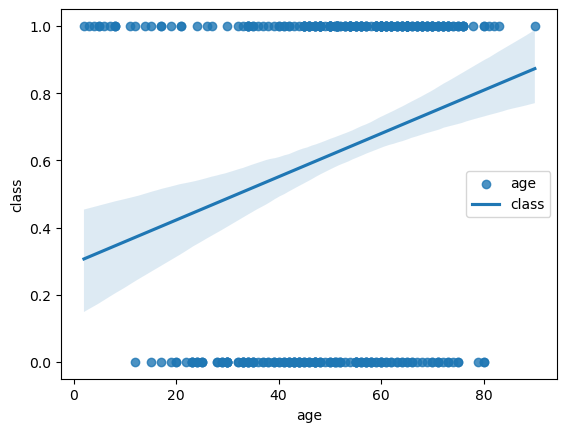

In [1048]:
sns.regplot(x='age',y='class',data=data)
plt.legend(["age","class"])
plt.show()

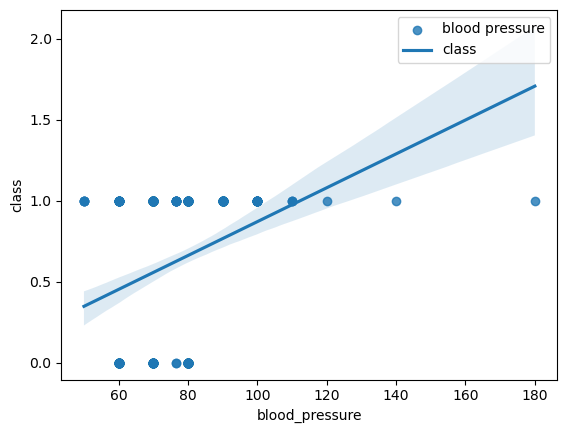

In [1049]:
sns.regplot(x='blood_pressure',y='class',data=data)
plt.legend(["blood pressure","class"])
plt.show()

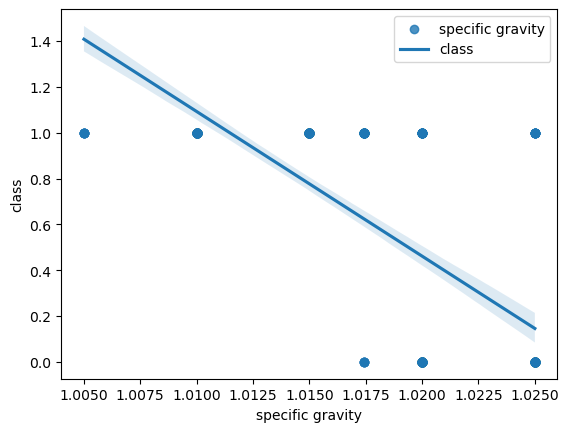

In [1050]:
sns.regplot(x='specific gravity',y='class',data=data)
plt.legend(["specific gravity","class"])
plt.show()

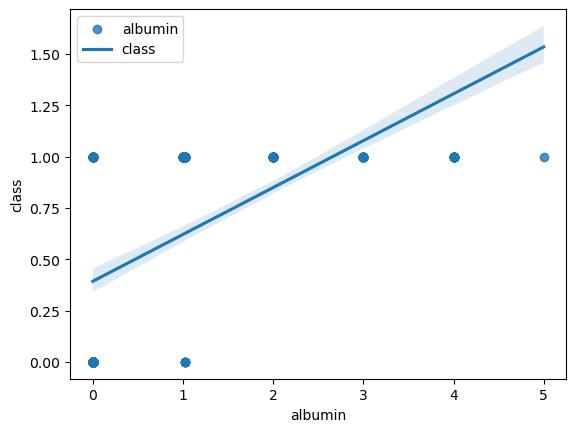

In [1051]:
sns.regplot(x='albumin',y='class',data=data)
plt.legend(["albumin","class"])
plt.show()

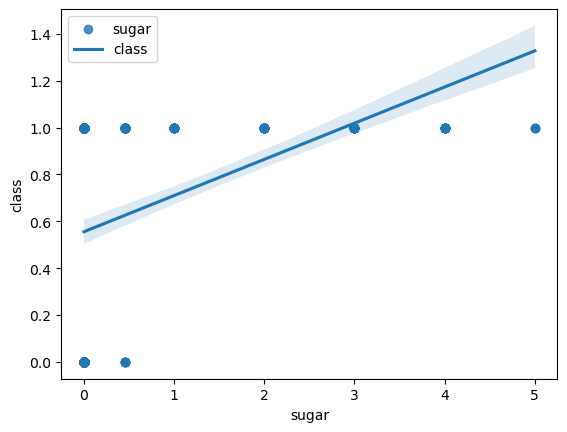

In [1052]:
sns.regplot(x='sugar',y='class',data=data)
plt.legend(["sugar","class"])
plt.show()

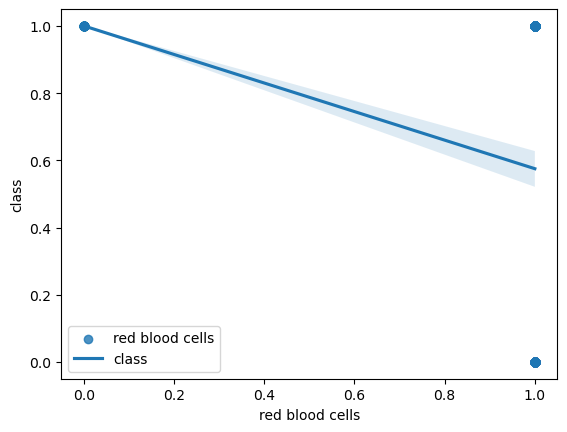

In [1053]:
sns.regplot(x='red blood cells',y='class',data=data)
plt.legend(["red blood cells","class"])
plt.show()

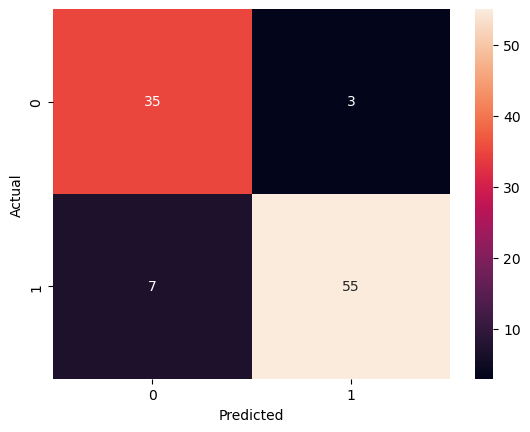

In [1054]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [1055]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.88        38
           1       0.95      0.89      0.92        62

    accuracy                           0.90       100
   macro avg       0.89      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



In [1056]:
#import the relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30) #split our data with test size of 20% 

knn=KNeighborsClassifier(n_neighbors=20) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.7


In [1057]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 0.72
Accuracy for k= 2 is: 0.71
Accuracy for k= 3 is: 0.71
Accuracy for k= 4 is: 0.71
Accuracy for k= 5 is: 0.7
Accuracy for k= 6 is: 0.7
Accuracy for k= 7 is: 0.7
Accuracy for k= 8 is: 0.69
Accuracy for k= 9 is: 0.71
Accuracy for k= 10 is: 0.7
Accuracy for k= 11 is: 0.69
Accuracy for k= 12 is: 0.7
Accuracy for k= 13 is: 0.69
Accuracy for k= 14 is: 0.69
Accuracy for k= 15 is: 0.69
Accuracy for k= 16 is: 0.72
Accuracy for k= 17 is: 0.71
Accuracy for k= 18 is: 0.69
Accuracy for k= 19 is: 0.69
Accuracy for k= 20 is: 0.71
Accuracy for k= 21 is: 0.74
Accuracy for k= 22 is: 0.72
Accuracy for k= 23 is: 0.75
Accuracy for k= 24 is: 0.75
Accuracy for k= 25 is: 0.76
Accuracy for k= 26 is: 0.76
Accuracy for k= 27 is: 0.8
Accuracy for k= 28 is: 0.75
Accuracy for k= 29 is: 0.86


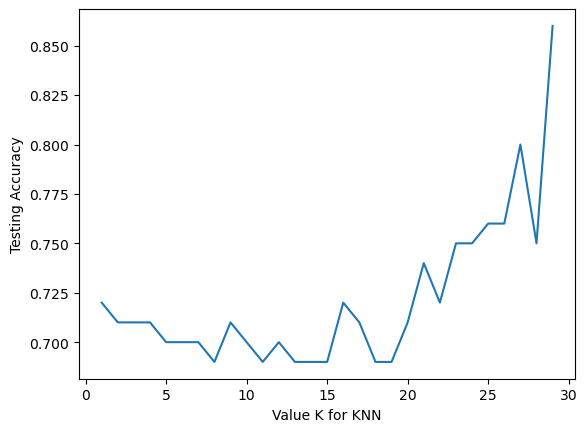

In [1058]:
import matplotlib.pyplot as plt
plt.plot(range(1,30),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [1059]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)
#applying tree algorithm
tree = tree.DecisionTreeClassifier()  
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.925


In [1060]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3) #splitting data with test size of 30%
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 10 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model


Accuracy: 0.9333333333333333


In [1061]:
# Drop the target variable
data.drop(columns=['class'])

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,15.4,44,7800,5.2,1,1,0,1,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,11.3,38,6000,5.2,0,0,0,1,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,9.6,31,7500,5.2,0,1,0,0,0,1
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,11.2,32,6700,3.9,1,0,0,0,1,1
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,11.6,35,7300,4.6,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,...,15.7,47,6700,4.9,0,0,0,1,0,0
396,396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,...,16.5,54,7800,6.2,0,0,0,1,0,0
397,397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,...,15.8,49,6600,5.4,0,0,0,1,0,0
398,398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,...,14.2,51,7200,5.9,0,0,0,1,0,0


In [1062]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric

In [1063]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,1
1,1
2,1
3,1
4,1
...,...
395,1
396,1
397,1
398,1


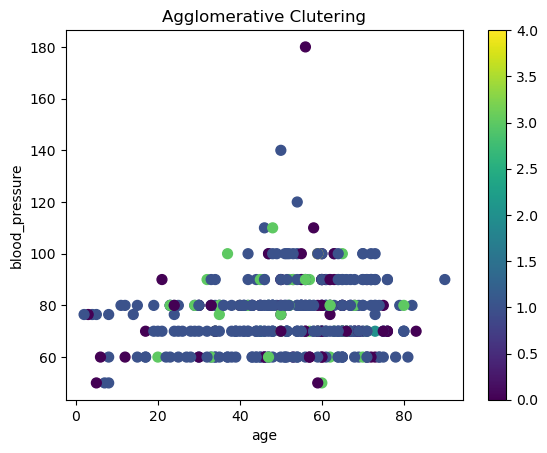

In [1066]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['age'] , data ["blood_pressure"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clutering")	
ax.set_xlabel("age")
ax.set_ylabel("blood_pressure")
plt.colorbar(scatter)
plt.show()


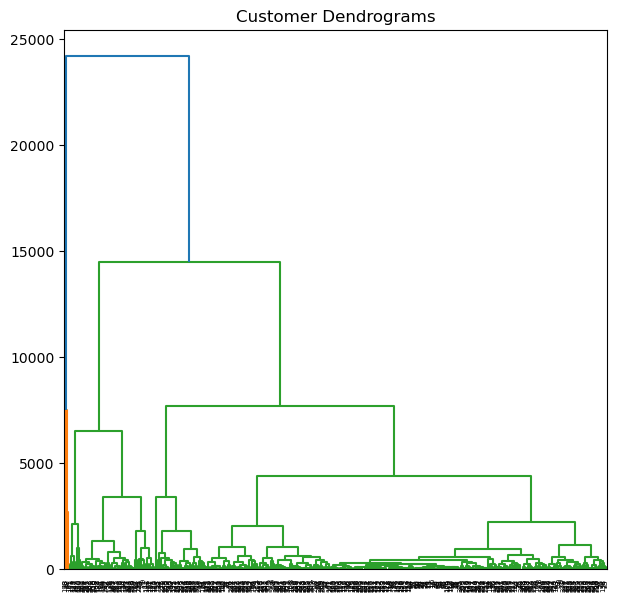

In [1068]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(7,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))